## Load data

In [3]:
import pandas as pd

# Load the merged and deduplicated data
df = pd.read_csv('data/merged/merged_data_deduplicated.csv')

# Display the first few rows and basic information about the DataFrame
print("First few rows of the data:")
display(df.head())

print("\nDataset information:")
display(df.info())

First few rows of the data:


,video_id,author,description,likes,comments,shares,plays,hashtags,music,create_time,video_url,fetch_time,views,posted_time
0,7506183500660313390,dalebrisby90,"That sounds like JB, ima go with TRUTH! 🤔🤣 #ro...",44800,125,1863,686000.0,"rodeotime, dalebrisby, jbmauney",original sound,2025-05-19 15:45:53,https://www.tiktok.com/@dalebrisby90/video/750...,NaN,NaN,NaN
1,7507316543605280030,jessicafloriolli,thanks for sticking around @Alonzofloriolli,285700,290,963,1200000.0,NaN,ECE Marketing Airball,2025-05-22 17:02:36,https://www.tiktok.com/@jessicafloriolli/video...,NaN,NaN,NaN
2,7507286333505719582,ay_2fya,#publicinterview #fyp #rizz,38000,65,496,416100.0,"publicinterview, fyp, rizz",original sound,2025-05-22 15:05:21,https://www.tiktok.com/@ay_2fya/video/75072863...,NaN,NaN,NaN
3,7506662216574209310,abell1823,Boat days hit different ✨,87200,259,23600,725800.0,NaN,If You Were Mine,2025-05-20 22:43:34,https://www.tiktok.com/@abell1823/video/750666...,NaN,NaN,NaN
4,7506628206280363310,jordanmarielynnxoxo,a lululemonnnn. #prettygirl #foryoupage #trend...,77600,724,1196,362100.0,"prettygirl, foryoupage, trending, likes",What Da Fuk,2025-05-20 20:32:12,https://www.tiktok.com/@jordanmarielynnxoxo/vi...,NaN,NaN,NaN



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7225 entries, 0 to 7224
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   video_id     7225 non-null   int64  
 1   author       7225 non-null   object 
 2   description  6533 non-null   object 
 3   likes        7225 non-null   int64  
 4   comments     7225 non-null   int64  
 5   shares       7225 non-null   int64  
 6   plays        7218 non-null   float64
 7   hashtags     5150 non-null   object 
 8   music        7225 non-null   object 
 9   create_time  7218 non-null   object 
 10  video_url    7225 non-null   object 
 11  fetch_time   7 non-null      object 
 12  views        7 non-null      float64
 13  posted_time  7 non-null      object 
dtypes: float64(2), int64(4), object(8)
memory usage: 790.4+ KB


None

## Null check

Null value analysis:


,Null Count,Null Percentage
video_id,0,0.00
author,0,0.00
description,692,9.58
likes,0,0.00
comments,0,0.00
shares,0,0.00
plays,7,0.10
hashtags,2075,28.72
music,0,0.00
create_time,7,0.10


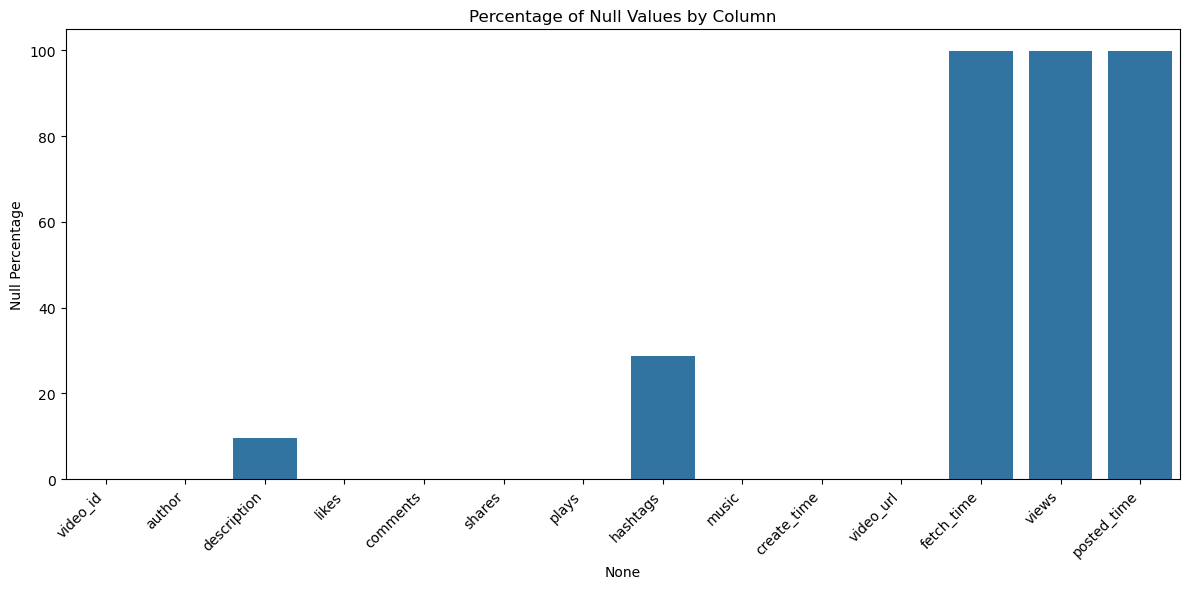

In [4]:
# Check for null values in each column
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to display null value information
null_info = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentages.round(2)
})

print("Null value analysis:")
display(null_info)

# Visualize null values distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=null_info.index, y='Null Percentage', data=null_info)
plt.xticks(rotation=45, ha='right')
plt.title('Percentage of Null Values by Column')
plt.tight_layout()
plt.show()

## Merge columns
- posted_time -> create_time
- views -> plays

In [5]:
# Fill create_time with posted_time where create_time is null
df['create_time'] = df['create_time'].fillna(df['posted_time'])

# Fill plays with views where plays is null
df['plays'] = df['plays'].fillna(df['views'])

# Drop the redundant columns since we've merged them
df = df.drop(['posted_time', 'views'], axis=1)

print("Checking columns after merging:")
print("\nNull values in create_time:", df['create_time'].isnull().sum())
print("Null values in plays:", df['plays'].isnull().sum())
print("\nFirst few rows of merged columns:")
display(df[['video_id', 'create_time', 'plays']].head())

Checking columns after merging:

Null values in create_time: 0
Null values in plays: 0

First few rows of merged columns:


,video_id,create_time,plays
0,7506183500660313390,2025-05-19 15:45:53,686000.0
1,7507316543605280030,2025-05-22 17:02:36,1200000.0
2,7507286333505719582,2025-05-22 15:05:21,416100.0
3,7506662216574209310,2025-05-20 22:43:34,725800.0
4,7506628206280363310,2025-05-20 20:32:12,362100.0


In [6]:
# Check for null values in each column
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to display null value information
null_info = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentages.round(2)
})

print("Null value analysis after merged posted_time and create_time:")
display(null_info)

Null value analysis after merged posted_time and create_time:


,Null Count,Null Percentage
video_id,0,0.00
author,0,0.00
description,692,9.58
likes,0,0.00
comments,0,0.00
shares,0,0.00
plays,0,0.00
hashtags,2075,28.72
music,0,0.00
create_time,0,0.00


## Data Preprocessing

Handle null values in:
1. description (9.58% null) - Fill with "No description"
2. hashtags (28.72% null) - Fill with empty list []
3. fetch_time (99.90% null) - Drop this column as it has too many null values and isn't critical

In [7]:
# Handle description nulls
df['description'] = df['description'].fillna('No description')

# Handle hashtags nulls - replace with empty list
df['hashtags'] = df['hashtags'].fillna('[]')

# Drop fetch_time column as it has too many nulls (99.90%)
df = df.drop('fetch_time', axis=1)

# Verify the changes
print("Null values after preprocessing:")
display(df.isnull().sum())

# Display sample of processed data
print("\nSample of processed data:")
display(df[['description', 'hashtags']].head())

# Verify column list
print("\nRemaining columns:")
display(df.columns.tolist())

Null values after preprocessing:


video_id       0
author         0
description    0
likes          0
comments       0
shares         0
plays          0
hashtags       0
music          0
create_time    0
video_url      0
dtype: int64


Sample of processed data:


,description,hashtags
0,"That sounds like JB, ima go with TRUTH! 🤔🤣 #ro...","rodeotime, dalebrisby, jbmauney"
1,thanks for sticking around @Alonzofloriolli,[]
2,#publicinterview #fyp #rizz,"publicinterview, fyp, rizz"
3,Boat days hit different ✨,[]
4,a lululemonnnn. #prettygirl #foryoupage #trend...,"prettygirl, foryoupage, trending, likes"



Remaining columns:


['video_id',
 'author',
 'description',
 'likes',
 'comments',
 'shares',
 'plays',
 'hashtags',
 'music',
 'create_time',
 'video_url']

## Clean Text Data

In [8]:
# Download NLTK resources (only need to run once)
import nltk
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

### Text cleaning and hashtag processing

In [9]:
import re
from nltk.corpus import stopwords
import numpy as np
import emoji

# Function to clean text
def clean_text(text):
    if not isinstance(text, str):
        return ""
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove emojis (using emoji library)
    text = emoji.replace_emoji(text, '')
    
    # Remove special characters and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    
    # Convert to lowercase
    text = text.lower().strip()
    
    # For sentiment analysis, we keep stopwords as they carry sentiment information
    # Examples: "not good", "very nice", "but terrible"
    
    return text

# Clean description column
df['clean_description'] = df['description'].apply(clean_text)

# Parse hashtags from the string representation
def parse_hashtags(hashtags_str):
    if not isinstance(hashtags_str, str) or hashtags_str == '[]':
        return []
    
    # Extract hashtags - they're usually comma-separated
    tags = [tag.strip() for tag in hashtags_str.split(',')]
    
    # Clean up the tags
    clean_tags = []
    for tag in tags:
        # Remove quotes, brackets, etc.
        tag = re.sub(r'[^\w\s]', '', tag).strip()
        if tag:  # Only add non-empty tags
            clean_tags.append(tag)
    
    return clean_tags

# Process hashtags
df['hashtag_list'] = df['hashtags'].apply(parse_hashtags)
df['hashtag_count'] = df['hashtag_list'].apply(len)

# Display examples of cleaned text
print("Examples of cleaned description:")
display(pd.DataFrame({
    'Original': df['description'].head(3),
    'Cleaned': df['clean_description'].head(3)
}))

print("\nExamples of processed hashtags:")
display(pd.DataFrame({
    'Original': df['hashtags'].head(3),
    'Processed': df['hashtag_list'].head(3),
    'Count': df['hashtag_count'].head(3)
}))

Examples of cleaned description:


,Original,Cleaned
0,"That sounds like JB, ima go with TRUTH! 🤔🤣 #ro...",that sounds like jb ima go with truth rodeoti...
1,thanks for sticking around @Alonzofloriolli,thanks for sticking around alonzofloriolli
2,#publicinterview #fyp #rizz,publicinterview fyp rizz



Examples of processed hashtags:


,Original,Processed,Count
0,"rodeotime, dalebrisby, jbmauney","[rodeotime, dalebrisby, jbmauney]",3
1,[],[],0
2,"publicinterview, fyp, rizz","[publicinterview, fyp, rizz]",3


## Process Timestamps and Create Time Features
Convert create_time to datetime and extract useful time features

Time feature examples:


,create_time,create_hour,day_of_week,is_weekend,time_period
0,2025-05-19 15:45:53,15,0,0,afternoon
1,2025-05-22 17:02:36,17,3,0,evening
2,2025-05-22 15:05:21,15,3,0,afternoon
3,2025-05-20 22:43:34,22,1,0,night
4,2025-05-20 20:32:12,20,1,0,evening


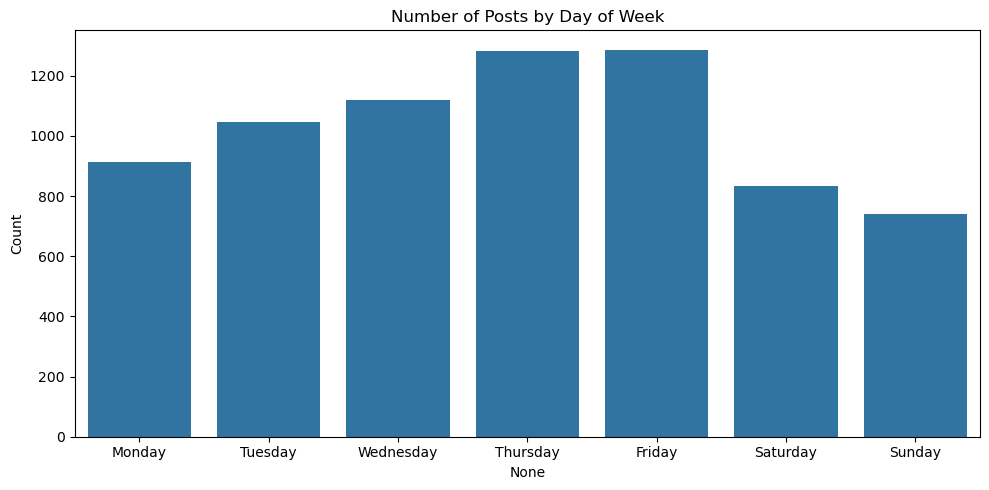

In [10]:
# Convert create_time to datetime
df['create_time'] = pd.to_datetime(df['create_time'], errors='coerce')

# Extract time features
df['create_hour'] = df['create_time'].dt.hour
df['create_day'] = df['create_time'].dt.day
df['create_month'] = df['create_time'].dt.month
df['create_year'] = df['create_time'].dt.year
df['day_of_week'] = df['create_time'].dt.dayofweek  # Monday=0, Sunday=6
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # 1 for weekend, 0 for weekday

# Create time period category
def get_time_period(hour):
    if hour >= 5 and hour < 12:
        return 'morning'
    elif hour >= 12 and hour < 17:
        return 'afternoon'
    elif hour >= 17 and hour < 22:
        return 'evening'
    else:
        return 'night'

df['time_period'] = df['create_hour'].apply(get_time_period)

# Display results
print("Time feature examples:")
display(df[['create_time', 'create_hour', 'day_of_week', 'is_weekend', 'time_period']].head())

# Count posts by day of week
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['day_of_week'].value_counts().sort_index()
day_counts.index = [day_names[i] for i in day_counts.index]

# Visualize posts by day of week
plt.figure(figsize=(10, 5))
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.title('Number of Posts by Day of Week')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Calculate Engagement Metrics
Create engagement metrics to quantify video performance

Engagement metrics examples:


,video_id,total_engagement,engagement_rate_per_play
0,7506183500660313390,46788,0.068204
1,7507316543605280030,286953,0.239127
2,7507286333505719582,38561,0.092672
3,7506662216574209310,111059,0.153016
4,7506628206280363310,79520,0.219608



Engagement metrics summary statistics:


,total_engagement,engagement_rate_per_play
count,7.225000e+03,7225.000000
mean,2.331798e+05,0.143919
std,4.526510e+05,0.081601
min,2.228000e+03,0.000809
25%,5.831700e+04,0.079482
50%,1.156800e+05,0.130383
75%,2.402000e+05,0.197989
max,1.412970e+07,0.463486


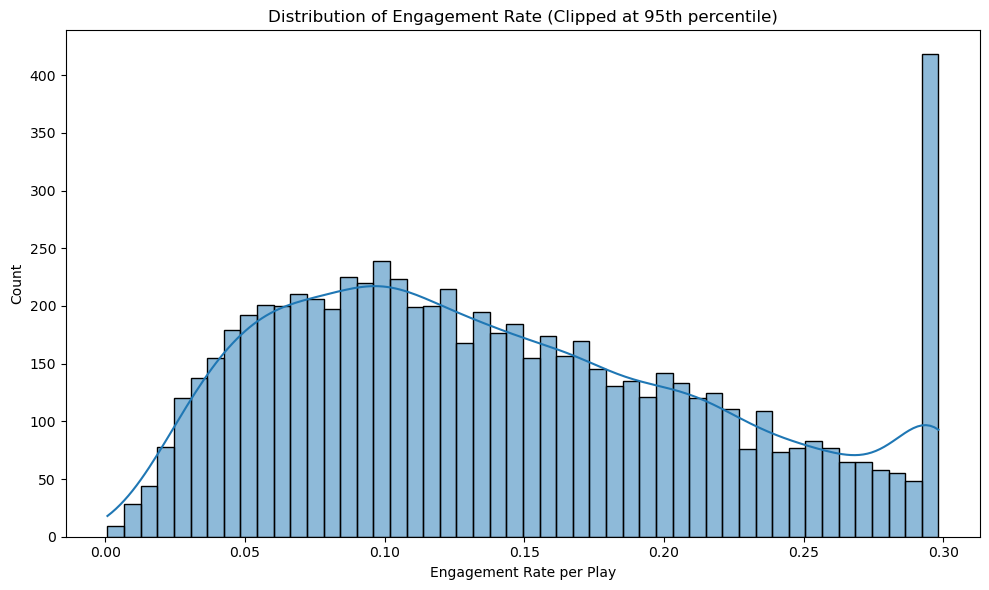

In [11]:
# Convert engagement metrics to numeric (if they aren't already)
import numpy as np
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')
df['comments'] = pd.to_numeric(df['comments'], errors='coerce')
df['shares'] = pd.to_numeric(df['shares'], errors='coerce')
df['plays'] = pd.to_numeric(df['plays'], errors='coerce')

# Calculate total engagement
df['total_engagement'] = df['likes'] + df['comments'] + df['shares']

# Calculate engagement rate (based on plays since we don't have follower count)
df['engagement_rate_per_play'] = df['total_engagement'] / df['plays']
df['engagement_rate_per_play'] = df['engagement_rate_per_play'].fillna(0).replace([np.inf, -np.inf], 0)

# Display engagement metrics
print("Engagement metrics examples:")
engagement_cols = ['video_id', 'total_engagement', 'engagement_rate_per_play']
display(df[engagement_cols].head())

# Basic summary statistics for engagement metrics
print("\nEngagement metrics summary statistics:")
display(df[['total_engagement', 'engagement_rate_per_play']].describe())

# Visualize distribution of engagement rate
plt.figure(figsize=(10, 6))
sns.histplot(df['engagement_rate_per_play'].clip(upper=df['engagement_rate_per_play'].quantile(0.95)), 
             bins=50, kde=True)
plt.title('Distribution of Engagement Rate (Clipped at 95th percentile)')
plt.xlabel('Engagement Rate per Play')
plt.tight_layout()
plt.show()

## Engagement Rate Distribution Analysis

The histogram of `engagement_rate_per_play` (clipped at the 95th percentile) shows:

- A right-skewed distribution with most videos having an engagement rate between 0.04 and 0.15.
- The peak of the distribution occurs around 0.08–0.10, indicating that the typical video receives about 8–10% engagement per view.
- A long tail toward higher engagement rates, reflecting a smaller number of highly engaging outlier videos.
- The clipping at the 95th percentile groups the top 5% of videos at the rightmost bin (~0.30), highlighting extreme outliers.

Implications:
- Most content achieves moderate engagement, so modeling or thresholding around 0.10 could distinguish above-average performance.
- The heavy tail suggests that only a small fraction of videos go viral; consider separate treatment for these high-engagement outliers.
- For predictive modeling, you might apply log or other transformations to reduce skewness, or treat extreme values separately.